# Visualizing trends in publishing delays

In [14]:
import gzip
import os
import datetime
import calendar

import pandas
import matplotlib
import seaborn
%matplotlib inline

In [10]:
# Read the cleaned article date information
path = os.path.join('data', 'articles-filtered.tsv.gz')
filtered_df = pandas.read_table(path, parse_dates=[3, 4, 5, 6])
filtered_df.head()

,journal,journal_issn,pubmed_id,received,revised,accepted,date_online,acceptance_delay,publication_delay
0,Astrophys J,0004-637X,10727377,2000-01-04,nan,2000-02-22,2000-03-16,49,23
1,Astrophys J,0004-637X,10727379,2000-01-31,nan,2000-02-28,2000-03-16,28,17
2,Astrophys J,0004-637X,10727380,2000-01-11,nan,2000-02-28,2000-03-21,48,22
3,Astrophys J,0004-637X,10727384,2000-01-28,nan,2000-02-22,2000-03-10,25,17
4,Am J Hum Genet,0002-9297,10968775,2000-05-19,nan,2000-08-03,2000-08-31,76,28


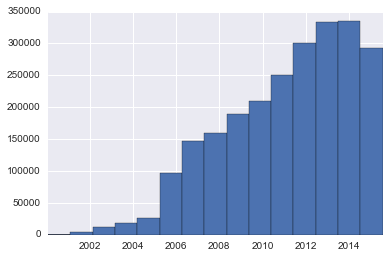

In [38]:
# Articles per year
ax = filtered_df.date_online.hist(bins=15)

In [39]:
def summarize(df):
    """Summarize delays over a dataframe"""
    row = pandas.Series()
    row['count'] = len(df)
    for column in 'acceptance_delay', 'publication_delay':
        row[column] = df[column].median()
    return row

# Calculate year summaries
year_df = filtered_df.groupby(by=filtered_df.date_online.map(lambda date: date.year)).apply(summarize).reset_index()
year_df

,date_online,count,acceptance_delay,publication_delay
0,2000,823,40,34
1,2001,3668,81,58
2,2002,10862,103,61
3,2003,16476,102,58
4,2004,20244,103,51
5,2005,72106,103,52
6,2006,135032,99,45
7,2007,149253,99,34
8,2008,174114,100,30
9,2009,195732,97,23


In [ ]:
# Save year summaries
path = os.path.join('data', 'years.tsv')
year_df.to_csv(path, sep='\t', index=False)

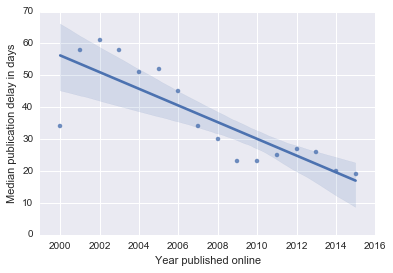

In [13]:
# Plot median publication delay versus online publication year
ax = seaborn.regplot('date_online', 'publication_delay', year_df, truncate=True)
matplotlib.pyplot.xlabel('Year published online');
matplotlib.pyplot.ylabel('Median publication delay in days');
matplotlib.pyplot.xlim(1999, 2016);

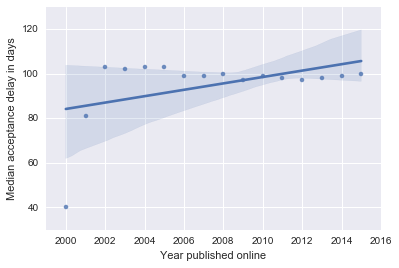

In [40]:
# Plot median acceptance delay versus online publication year
ax = seaborn.regplot('date_online', 'acceptance_delay', year_df, truncate=True)
matplotlib.pyplot.xlabel('Year published online');
matplotlib.pyplot.ylabel('Median acceptance delay in days');
matplotlib.pyplot.xlim(1999, 2016);